In [5]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install speedtest-cli

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

In [3]:
pip install PyQt5

Note: you may need to restart the kernel to use updated packages.


In [17]:
import matplotlib
matplotlib.use('Qt5Agg')

In [18]:
import time
import requests
import speedtest
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


# Initialize data storage
response_times = []
internet_speeds = []
time_stamps = []

%matplotlib notebook

# Function to measure server response time
def measure_response_time():
    try:
        start_time = time.time()
        response = requests.get("https://zadosti.sfzp.cz/", timeout=5)  # Replace with your target server
        response.raise_for_status()
        elapsed_time = time.time() - start_time
        return elapsed_time * 1000  # Convert to milliseconds
    except requests.exceptions.RequestException:
        return None

# Function to measure internet download speed
def measure_internet_speed():
    try:
        st = speedtest.Speedtest()
        st.get_best_server()
        download_speed = st.download() / 1_000_000  # Convert to Mbps
        return download_speed
    except Exception:
        return None

# Update the data and refresh the plot
def update(frame):
    global response_times, internet_speeds, time_stamps

    # Collect data
    response_time = measure_response_time()
    internet_speed = measure_internet_speed()
    current_time = time.strftime("%H:%M:%S")

    # Update lists
    if response_time is not None and internet_speed is not None:
        response_times.append(response_time)
        internet_speeds.append(internet_speed)
        time_stamps.append(current_time)

    # Limit the data to the last 10 points
    response_times = response_times[-10:]
    internet_speeds = internet_speeds[-10:]
    time_stamps = time_stamps[-10:]

    # Clear the plot
    plt.cla()

    # Plot response times
    plt.plot(time_stamps, response_times, label="Server Response Time (ms)", marker="o")
    
    # Plot internet speeds
    plt.plot(time_stamps, internet_speeds, label="Internet Speed (Mbps)", marker="o")

    plt.xlabel("Time")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Values")
    plt.title("Real-Time Monitoring of Server and Internet Performance")
    plt.legend(loc="upper left")
    plt.tight_layout()
    
ani = FuncAnimation(fig, update, interval=15000, cache_frame_data=False)  # Update every 15 seconds

# Set up the plot
fig = plt.figure(figsize=(10, 6))
ani = FuncAnimation(fig, update, interval=15000, blit=True, cache_frame_data=False)  # Update every 15 seconds

plt.ion()
plt.show()


<IPython.core.display.Javascript object>

In [16]:
import matplotlib
matplotlib.use('Qt5Agg')

In [ ]:
import time
import requests
import speedtest
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from tkinter import Tk, Frame
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Initialize data storage
response_times = []
internet_speeds = []
time_stamps = []

# Function to measure server response time
def measure_response_time():
    try:
        start_time = time.time()
        response = requests.get("https://zadosti.sfzp.cz/", timeout=10)  # Replace with your target server
        response.raise_for_status()
        elapsed_time = time.time() - start_time
        return elapsed_time * 1000  # Convert to milliseconds
    except requests.exceptions.RequestException:
        return None

# Function to measure internet download speed
def measure_internet_speed():
    try:
        st = speedtest.Speedtest()
        st.get_best_server()
        download_speed = st.download() / 1_000_000  # Convert to Mbps
        return download_speed
    except Exception:
        return None

# Update the data and refresh the plot
def update(frame):
    global response_times, internet_speeds, time_stamps

    # Collect data
    response_time = measure_response_time()
    internet_speed = measure_internet_speed()
    current_time = time.strftime("%H:%M:%S")

    # Update lists
    if response_time is not None and internet_speed is not None:
        response_times.append(response_time)
        internet_speeds.append(internet_speed)
        time_stamps.append(current_time)

    # Limit the data to the last 10 points
    response_times = response_times[-10:]
    internet_speeds = internet_speeds[-10:]
    time_stamps = time_stamps[-10:]

    # Clear the plot
    ax.clear()

    # Plot response times
    ax.plot(time_stamps, response_times, label="Server Response Time (ms)", marker="o")
    
    # Plot internet speeds
    ax.plot(time_stamps, internet_speeds, label="Internet Speed (Mbps)", marker="o")

    ax.set_xlabel("Time")
    ax.set_xticklabels(time_stamps, rotation=45, ha="right")
    ax.set_ylabel("Values")
    ax.set_title("Real-Time Monitoring of Server and Internet Performance")
    ax.legend(loc="upper left")
    fig.tight_layout()

# Create the main Tkinter window
root = Tk()
root.title("Real-Time Graph")

# Create a frame for the plot
frame = Frame(root)
frame.pack()

# Create the matplotlib figure and axes
fig, ax = plt.subplots(figsize=(10, 6))
canvas = FigureCanvasTkAgg(fig, master=frame)
canvas_widget = canvas.get_tk_widget()
canvas_widget.pack()

# Create the animation
ani = FuncAnimation(fig, update, interval=15000)

# Run the Tkinter main loop
root.mainloop()


<IPython.core.display.Javascript object>

C:\Users\jpawlas\AppData\Local\Temp\ipykernel_18312\3934000107.py:86: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(fig, update, interval=15000)
C:\Users\jpawlas\AppData\Local\Temp\ipykernel_18312\3934000107.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(time_stamps, rotation=45, ha="right")
C:\Users\jpawlas\AppData\Local\Temp\ipykernel_18312\3934000107.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(time_stamps, rotation=45, ha="right")
C:\Users\jpawlas\AppData\Local\Temp\ipykernel_18312\3934000107.py:65

In [ ]:
import time
import requests
import speedtest
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from tkinter import Tk, Frame
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import threading

# Initialize data storage
response_times = []
internet_speeds = []
time_stamps = []
lock = threading.Lock()

# Function to measure server response time
def measure_response_time():
    try:
        start_time = time.time()
        response = requests.get("https://zadosti.sfzp.cz/", timeout=10)  # Replace with your target server
        response.raise_for_status()
        elapsed_time = time.time() - start_time
        return elapsed_time * 1000  # Convert to milliseconds
    except requests.exceptions.RequestException:
        return None

# Function to measure internet download speed
def measure_internet_speed():
    try:
        st = speedtest.Speedtest()
        st.get_best_server()
        download_speed = st.download() / 1_000_000  # Convert to Mbps
        return download_speed
    except Exception:
        return None

# Background thread function for data collection
def collect_data():
    global response_times, internet_speeds, time_stamps
    while True:
        response_time = measure_response_time()
        internet_speed = measure_internet_speed()
        current_time = time.strftime("%H:%M:%S")

        # Update data with thread lock
        with lock:
            if response_time is not None and internet_speed is not None:
                response_times.append(response_time)
                internet_speeds.append(internet_speed)
                time_stamps.append(current_time)

                # Limit the data to the last 10 points
                response_times = response_times[-10:]
                internet_speeds = internet_speeds[-10:]
                time_stamps = time_stamps[-10:]

        time.sleep(15)  # Wait for 15 seconds before next update

# Update the data and refresh the plot
def update(frame):
    global response_times, internet_speeds, time_stamps
    with lock:
        # Clear the plot
        ax.clear()

        # Plot response times
        ax.plot(time_stamps, response_times, label="Server Response Time (ms)", marker="o")
        
        # Plot internet speeds
        ax.plot(time_stamps, internet_speeds, label="Internet Speed (Mbps)", marker="o")

        ax.set_xlabel("Time")
        ax.set_xticklabels(time_stamps, rotation=45, ha="right")
        ax.set_ylabel("Values")
        ax.set_title("Real-Time Monitoring of Server and Internet Performance")
        ax.legend(loc="upper left")
        fig.tight_layout()

# Create the main Tkinter window
root = Tk()
root.title("Real-Time Graph")

# Create a frame for the plot
frame = Frame(root)
frame.pack()

# Create the matplotlib figure and axes
fig, ax = plt.subplots(figsize=(10, 6))
canvas = FigureCanvasTkAgg(fig, master=frame)
canvas_widget = canvas.get_tk_widget()
canvas_widget.pack()

# Start the background thread
data_thread = threading.Thread(target=collect_data, daemon=True)
data_thread.start()

# Create the animation
ani = FuncAnimation(fig, update, interval=1000)  # Update every second

# Run the Tkinter main loop
root.mainloop()


In [1]:
pip install asyncio

Response Time: 62.44540214538574 ms, Internet Speed: None Mbps


C:\Users\jpawlas\AppData\Local\Temp\ipykernel_17228\3687726424.py:99: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(fig, update, interval=500)  # Update every 0.5 seconds


Data points: 0, 0, 0
Data points: 0, 0, 0
Data points: 0, 0, 0
Data points: 0, 0, 0
Data points: 0, 0, 0
Data points: 0, 0, 0
Data points: 0, 0, 0
Data points: 0, 0, 0
Data points: 0, 0, 0
Data points: 0, 0, 0


KeyboardInterrupt: 

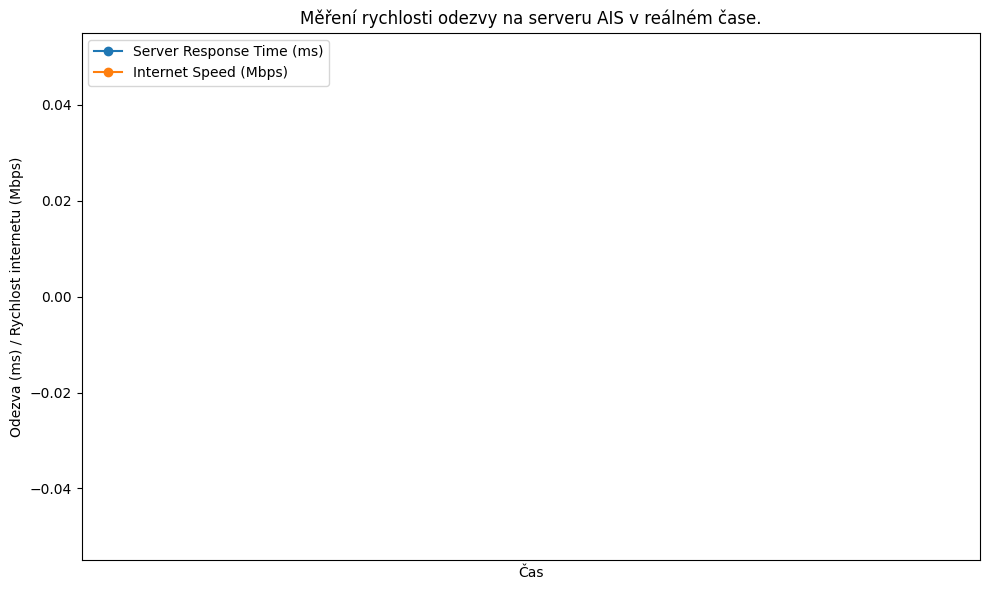

Response Time: 75.32382011413574 ms, Internet Speed: None Mbps


: 

In [13]:
import time
import requests
import speedtest
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from tkinter import Tk, Frame
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import threading

# Initialize data storage
response_times = []
internet_speeds = []
time_stamps = []
lock = threading.Lock()
measurement_duration = 5 * 60 * 60  # 5 hodin = 18000 sekund

def measure_response_time():
    try:
        headers = {'User-Agent': 'MonitoringTool/1.0'}  # Add User-Agent header
        start_time = time.time()
        response = requests.get("https://ais.sfzp.cz/", timeout=2, headers=headers)  # Request with headers
        response.raise_for_status()
        elapsed_time = time.time() - start_time
        return elapsed_time * 1000  # Convert to milliseconds
    except requests.exceptions.RequestException as e:
        print(f"Request failed: {e}")
        return None

def measure_internet_speed():
    try:
        st = speedtest.Speedtest()
        download_speed = st.download() / 1_000_000  # Convert to Mbps
        return download_speed  # Mbps
    except Exception:
        return None

def collect_data():
    global response_times, internet_speeds, time_stamps
    start_time = time.time()

    while True:
        elapsed_time = time.time() - start_time
        if elapsed_time > measurement_duration:  # Stop after the defined duration
            print("Measurement finished.")
            break

        response_time = measure_response_time()
        internet_speed = measure_internet_speed()
        current_time = time.strftime("%H:%M:%S")

        # Debug: Print collected data for verification
        print(f"Response Time: {response_time} ms, Internet Speed: {internet_speed} Mbps")

        # Update data with thread lock
        with lock:
            if response_time is not None and internet_speed is not None:
                response_times.append(response_time)
                internet_speeds.append(internet_speed)
                time_stamps.append(current_time)

                # Limit data to last 20 points for readability
                response_times = response_times[-20:]
                internet_speeds = internet_speeds[-20:]
                time_stamps = time_stamps[-20:]

        time.sleep(10)  # Wait for 10 seconds before next update

def update(frame):
    global response_times, internet_speeds, time_stamps
    with lock:
        ax.clear()
        ax.plot(time_stamps, response_times, label="Server Response Time (ms)", marker="o")
        ax.plot(time_stamps, internet_speeds, label="Internet Speed (Mbps)", marker="o")

        ax.set_xlabel("Čas")
        ax.set_xticks(range(0, len(time_stamps), max(1, len(time_stamps) // 5)))
        ax.set_xticklabels(time_stamps, rotation=45, ha="right")
        ax.set_ylabel("Odezva (ms) / Rychlost internetu (Mbps)")
        ax.set_title("Měření rychlosti odezvy na serveru AIS v reálném čase.")
        ax.legend(loc="upper left")
        fig.tight_layout()

        # Debug: Print lengths of lists to verify data is updating
        print(f"Data points: {len(response_times)}, {len(internet_speeds)}, {len(time_stamps)}")

root = Tk()
root.title("Real-Time Graph")
frame = Frame(root)
frame.pack()

fig, ax = plt.subplots(figsize=(10, 6))
canvas = FigureCanvasTkAgg(fig, master=frame)
canvas_widget = canvas.get_tk_widget()
canvas_widget.pack()

data_thread = threading.Thread(target=collect_data, daemon=True)
data_thread.start()

ani = FuncAnimation(fig, update, interval=500)  # Update every 0.5 seconds

root.mainloop()


In [22]:
pip install speedtest

In [26]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


C:\Users\jpawlas\AppData\Local\Temp\ipykernel_4632\246323062.py:104: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(fig, update, interval=500)  # Update every 0.5 seconds
Exception in thread Thread-18 (collect_data):
Traceback (most recent call last):
  File "c:\Users\jpawlas\AppData\Local\Programs\Python\Python313\Lib\threading.py", line 1041, in _bootstrap_inner
    self.run()
    ~~~~~~~~^^
  File "C:\Users\jpawlas\AppData\Roaming\Python\Python313\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
    ~~~~~~~~~~~~~~~~~~~~~^^^^^^
  File "c:\Users\jpawlas\AppData\Local\Programs\Python\Python313\Lib\threading.py", line 992, in run
    self._target(*self._args, **self._kwargs)

KeyboardInterrupt: 

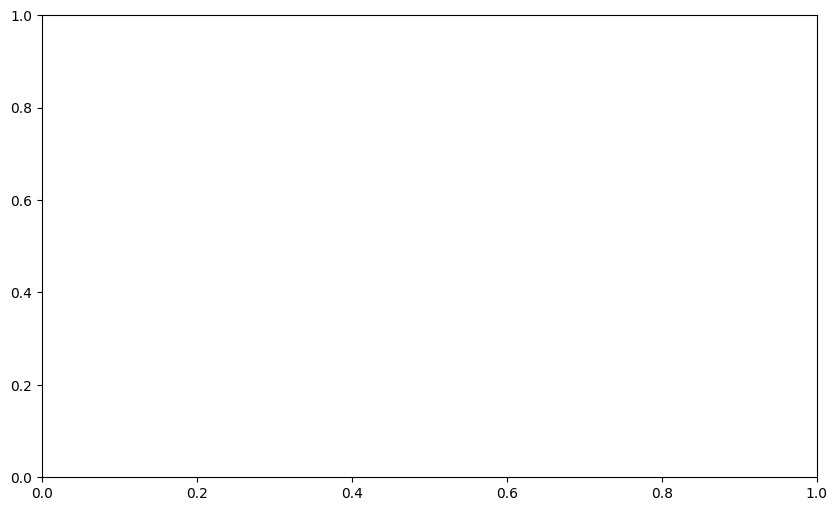

: 

In [ ]:
import time
import requests
import speedtest
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from tkinter import Tk, Frame
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import threading

# Initialize data storage
response_times = []
internet_speeds = []
time_stamps = []
lock = threading.Lock()
measurement_duration = 60 

def measure_response_time():
    try:
        headers = {'testování rychlosti odezvy webu AIS': 'MonitoringTool/1.1'}  
        start_time = time.time()
        response = requests.get("https://ais.sfzp.cz/", timeout=2, headers=headers)  
        response.raise_for_status()
        elapsed_time = time.time() - start_time
        return elapsed_time * 1000  
    except requests.exceptions.RequestException as e:
        print(f"Request failed: {e}")
        return None

def measure_internet_speed():
    try:
        SERVER_ID = 11181  # Replace with a valid server ID
        st = speedtest.Speedtest()
        st.get_servers([SERVER_ID])  
        st.get_best_server()  # Select the best from the filtered servers
        download_speed = st.download() / 1_000_000  # Convert to Mbps
        print(f"Internet Speed Test: {download_speed:.2f} Mbps using Server ID {SERVER_ID}")
        return download_speed  # Mbps
    except Exception as e:
        print(f"Internet speed test failed: {e}")
        return None

def collect_data():
    global response_times, internet_speeds, time_stamps
    start_time = time.time()

    while True:
        elapsed_time = time.time() - start_time
        if elapsed_time > measurement_duration:  # Stop after the defined duration
            print("Measurement finished.")
            break

        response_time = measure_response_time()
        internet_speed = measure_internet_speed()
        current_time = time.strftime("%H:%M:%S")

        # Debug: Print collected data for verification
        print(f"Response Time: {response_time} ms, Internet Speed: {internet_speed} Mbps")

        # Update data with thread lock
        with lock:
            if response_time is not None and internet_speed is not None:
                response_times.append(response_time)
                internet_speeds.append(internet_speed)
                time_stamps.append(current_time)

                # Limit data to last 20 points for readability
                response_times = response_times[-20:]
                internet_speeds = internet_speeds[-20:]
                time_stamps = time_stamps[-20:]

        time.sleep(10)  # Wait for 10 seconds before next update

def update(frame):
    global response_times, internet_speeds, time_stamps
    with lock:
        ax.clear()
        ax.plot(time_stamps, response_times, label="Časová odpověď serveru (ms)", marker="-")
        ax.plot(time_stamps, internet_speeds, label="Rychlost internetu (Mbps)", marker="-")

        ax.set_xlabel("Čas")
        ax.set_xticks(range(0, len(time_stamps), max(1, len(time_stamps) // 5)))
        ax.set_xticklabels(time_stamps, rotation=45, ha="right")
        ax.set_ylabel("Odezva (ms) / Rychlost internetu (Mbps)")
        ax.set_title("Měření rychlosti odezvy na serveru AIS v reálném čase.")
        ax.legend(loc="upper left")
        fig.tight_layout()

        # Debug: Print lengths of lists to verify data is updating
        print(f"Data points: {len(response_times)}, {len(internet_speeds)}, {len(time_stamps)}")

root = Tk()
root.title("Real-Time Graph")
frame = Frame(root)
frame.pack()

fig, ax = plt.subplots(figsize=(10, 6))
canvas = FigureCanvasTkAgg(fig, master=frame)
canvas_widget = canvas.get_tk_widget()
canvas_widget.pack()

data_thread = threading.Thread(target=collect_data, daemon=True)
data_thread.start()

ani = FuncAnimation(fig, update, interval=500)  # Update every 0.5 seconds

root.mainloop()



In [ ]:
import time
import requests
import speedtest
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from tkinter import Tk, Frame
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import threading

# Initialize data storage
response_times = []
internet_speeds = []
time_stamps = []
lock = threading.Lock()
measurement_duration = 60 

def measure_response_time():
    try:
        headers = {'testování rychlosti odezvy webu AIS': 'MonitoringTool/1.1'}  
        start_time = time.time()
        response = requests.get("https://ais.sfzp.cz/", timeout=2, headers=headers)  
        response.raise_for_status()
        elapsed_time = time.time() - start_time
        return elapsed_time * 1000  
    except requests.exceptions.RequestException as e:
        print(f"Request failed: {e}")
        return None

def measure_internet_speed():
    try:
        SERVER_ID = 11181  # Replace with a valid server ID
        st = speedtest.Speedtest()
        st.get_servers([SERVER_ID])  
        st.get_best_server()  # Select the best from the filtered servers
        download_speed = st.download() / 1_000_000  # Convert to Mbps
        print(f"Internet Speed Test: {download_speed:.2f} Mbps using Server ID {SERVER_ID}")
        return download_speed  # Mbps
    except Exception as e:
        print(f"Internet speed test failed: {e}")
        return None

def collect_data():
    global response_times, internet_speeds, time_stamps
    start_time = time.time()

    while True:
        elapsed_time = time.time() - start_time
        if elapsed_time > measurement_duration:  # Stop after the defined duration
            print("Measurement finished.")
            break

        response_time = measure_response_time()
        internet_speed = measure_internet_speed()
        current_time = time.strftime("%H:%M:%S")

        # Debug: Print collected data for verification
        print(f"Response Time: {response_time} ms, Internet Speed: {internet_speed} Mbps")

        # Update data with thread lock
        with lock:
            if response_time is not None and internet_speed is not None:
                response_times.append(response_time)
                internet_speeds.append(internet_speed)
                time_stamps.append(current_time)

                # Limit data to last 20 points for readability
                response_times = response_times[-20:]
                internet_speeds = internet_speeds[-20:]
                time_stamps = time_stamps[-20:]

        time.sleep(10)  # Wait for 10 seconds before next update

def update(frame):
    global response_times, internet_speeds, time_stamps
    with lock:
        ax.clear()
        ax.plot(time_stamps, response_times, label="Časová odpověď serveru (ms)", marker="-")
        ax.plot(time_stamps, internet_speeds, label="Rychlost internetu (Mbps)", marker="-")

        ax.set_xlabel("Čas")
        ax.set_xticks(range(0, len(time_stamps), max(1, len(time_stamps) // 4)))
        ax.set_xticklabels(time_stamps, rotation=45, ha="right")
        ax.set_ylabel("Odezva (ms) / Rychlost internetu (Mbps)")
        ax.set_title("Měření rychlosti odezvy na serveru AIS v reálném čase.")
        ax.legend(loc="upper left")
        fig.tight_layout()

        # Debug: Print lengths of lists to verify data is updating
        print(f"Data points: {len(response_times)}, {len(internet_speeds)}, {len(time_stamps)}")

root = Tk()
root.title("Real-Time Graph")
frame = Frame(root)
frame.pack()

fig, ax = plt.subplots(figsize=(10, 6))
canvas = FigureCanvasTkAgg(fig, master=frame)
canvas_widget = canvas.get_tk_widget()
canvas_widget.pack()

data_thread = threading.Thread(target=collect_data, daemon=True)
data_thread.start()

ani = FuncAnimation(fig, update, interval=500)  # Update every 0.5 seconds

root.mainloop()



In [ ]:
pip install speedtest-cli

Note: you may need to restart the kernel to use updated packages.


In [11]:
import speedtest

def test_speed():
    try:
        st = speedtest.Speedtest()
        st.get_servers()
        st.get_best_server()
        download_speed = st.download() / 1_000_000
        print(f"Internet Speed: {download_speed:.2f} Mbps")
    except Exception as e:
        print(f"Test failed: {e}")

test_speed()

Test failed: module 'speedtest' has no attribute 'Speedtest'


In [4]:
import speedtest

def list_speedtest_servers():
    try:
        st = speedtest.Speedtest()
        servers = st.get_servers()  # Fetch available servers
        for server_list in servers.values():
            for server in server_list:
                print(f"Server ID: {server['id']}, Name: {server['name']}, Country: {server['country']}")
    except Exception as e:
        print(f"Failed to fetch servers: {e}")

# Call the function to list servers
list_speedtest_servers()



Failed to fetch servers: module 'speedtest' has no attribute 'Speedtest'


In [8]:
pip install speedtest-cli

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import speedtest

def test_internet_speed():
    st = speedtest.Speedtest()  # Inicializace knihovny
    st.get_best_server()  # Najde nejlepší server podle odezvy
    download_speed = st.download()  # Měření rychlosti stahování
    upload_speed = st.upload()  # Měření rychlosti nahrávání
    ping = st.results.ping  # Odezva (ping)

    print(f"Rychlost stahování: {download_speed / 1_000_000:.2f} Mbps")
    print(f"Rychlost nahrávání: {upload_speed / 1_000_000:.2f} Mbps")
    print(f"Ping: {ping:.2f} ms")

if __name__ == "__main__":
    test_internet_speed()


C:\Users\jpawlas\AppData\Local\Temp\ipykernel_21180\659627132.py:107: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(fig, update, interval=1000)


Data points: 0, 0, 0
Internet speed test failed: module 'speedtest' has no attribute 'Speedtest'
Response Time: 340.5020236968994 ms, Internet Speed: None Mbps
Data points: 1, 1, 1
Data points: 1, 1, 1
Data points: 1, 1, 1
Data points: 1, 1, 1
Data points: 1, 1, 1
Data points: 1, 1, 1
Data points: 1, 1, 1
Data points: 1, 1, 1
Data points: 1, 1, 1
Internet speed test failed: module 'speedtest' has no attribute 'Speedtest'
Response Time: 46.04220390319824 ms, Internet Speed: None Mbps
Data points: 2, 2, 2
Data points: 2, 2, 2
Data points: 2, 2, 2
Data points: 2, 2, 2
Data points: 2, 2, 2
Data points: 2, 2, 2
Data points: 2, 2, 2
Data points: 2, 2, 2
Data points: 2, 2, 2
Data points: 2, 2, 2
Internet speed test failed: module 'speedtest' has no attribute 'Speedtest'
Response Time: 54.567575454711914 ms, Internet Speed: None Mbps
Data points: 3, 3, 3
Data points: 3, 3, 3
Data points: 3, 3, 3
Data points: 3, 3, 3
Data points: 3, 3, 3
Data points: 3, 3, 3
Data points: 3, 3, 3
Data points: 3,

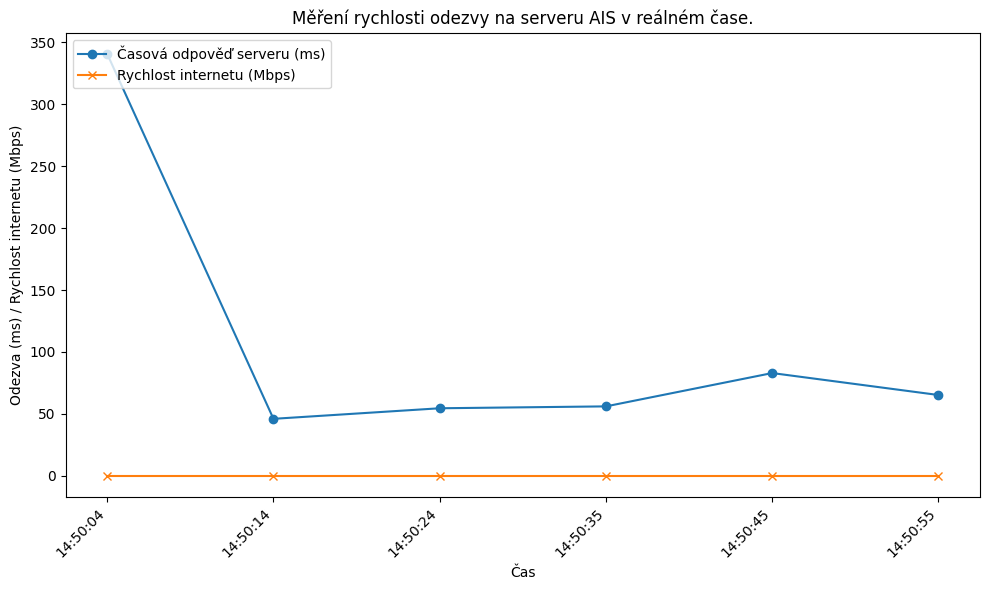

In [1]:
import time
import requests
import speedtest
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from tkinter import Tk, Frame
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import threading

# Initialize data storage
response_times = []
internet_speeds = []
time_stamps = []
lock = threading.Lock()
measurement_duration = 60  # seconds

def measure_response_time():
    try:
        headers = {'Ohleduplné testování odezvy serveru AIS': 'MonitoringTool/1.1'}  
        start_time = time.time()
        response = requests.get("https://ais.sfzp.cz/", timeout=2, headers=headers)  
        response.raise_for_status()
        elapsed_time = time.time() - start_time
        return elapsed_time * 1000  
    except requests.exceptions.RequestException as e:
        print(f"Request failed: {e}")
        return None

def measure_internet_speed():
    try:
        SERVER_ID = 11181  
        st = speedtest.Speedtest()
        st.get_servers([SERVER_ID])  
        st.get_best_server()  
        download_speed = st.download() / 1_000_000  
        print(f"Internet Speed Test: {download_speed:.2f} Mbps using Server ID {SERVER_ID}")
        return download_speed  
    except Exception as e:
        print(f"Internet speed test failed: {e}")
        return None

def collect_data():
    global response_times, internet_speeds, time_stamps
    start_time = time.time()

    while True:
        elapsed_time = time.time() - start_time
        if elapsed_time > measurement_duration:  
            print("Measurement finished.")
            break

        response_time = measure_response_time()
        internet_speed = measure_internet_speed()
        current_time = time.strftime("%H:%M:%S")

        print(f"Response Time: {response_time} ms, Internet Speed: {internet_speed} Mbps")

        with lock:
            if response_time is not None:
                response_times.append(response_time)
            else:
                response_times.append(0)  

            if internet_speed is not None:
                internet_speeds.append(internet_speed)
            else:
                internet_speeds.append(0)

            time_stamps.append(current_time)

            response_times = response_times[-20:]
            internet_speeds = internet_speeds[-20:]
            time_stamps = time_stamps[-20:]

        time.sleep(10)  

def update(frame):
    global response_times, internet_speeds, time_stamps
    with lock:
        ax.clear()
        ax.plot(response_times, label="Časová odpověď serveru (ms)", marker="o")
        ax.plot(internet_speeds, label="Rychlost internetu (Mbps)", marker="x")

        ax.set_xlabel("Čas")
        ax.set_xticks(range(0, len(time_stamps), max(1, len(time_stamps) // 4)))
        ax.set_xticklabels(time_stamps, rotation=45, ha="right")
        ax.set_ylabel("Odezva (ms) / Rychlost internetu (Mbps)")
        ax.set_title("Měření rychlosti odezvy na serveru AIS v reálném čase.")
        ax.legend(loc="upper left")
        fig.tight_layout()

        print(f"Data points: {len(response_times)}, {len(internet_speeds)}, {len(time_stamps)}")

root = Tk()
root.title("Real-Time Graph")
frame = Frame(root)
frame.pack()

fig, ax = plt.subplots(figsize=(10, 6))
canvas = FigureCanvasTkAgg(fig, master=frame)
canvas_widget = canvas.get_tk_widget()
canvas_widget.pack()

data_thread = threading.Thread(target=collect_data, daemon=True)
data_thread.start()

ani = FuncAnimation(fig, update, interval=1000)  

root.mainloop()


In [2]:
pip show speedtest-cli

Name: speedtest-cli
Version: 2.1.3
Summary: Command line interface for testing internet bandwidth using speedtest.net
Home-page: https://github.com/sivel/speedtest-cli
Author: Matt Martz
Author-email: matt@sivel.net
License: Apache License, Version 2.0
Location: c:\Users\jpawlas\AppData\Local\Programs\Python\Python313\Lib\site-packages
Requires: 
Required-by: 
Note: you may need to restart the kernel to use updated packages.
